# Deep Recurrent Q-Network

As we have seen, DQNs can be quiet powerful, but have their limit. To expand their field of application, we can replace the first post-convolutional fully connected layer with a recurrent neural network (RNN). 

### RNNs have two advantages:
1. They can store information and thus have a memory
2. They can learn sequential data

The connection between the units of the network form a directed circle, resulting into the ability to "remember". This leads to better results with arbitrary inputs, i.e. handwriting or voices.
Too learn more, look [here](https://arxiv.org/pdf/1507.06527.pdf). 

A recurrent neural network and the unfolding in time of the computation involved in its forward computation. Source: Nature
If i.e. we're looking at words, each word gets its own layer.


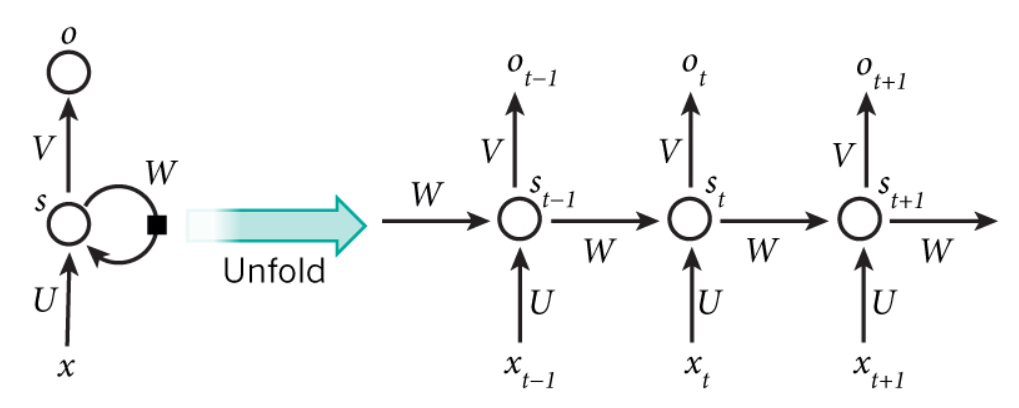


## RNN MNIST Dataset

To learn what RNNs are, we go back to the MNIST Dataset, which you know from 1. Tensorflow Basics.(link einfügen!)
This time, we classify images using a recurrent neural network, as we consider every image row as a sequence of pixels. Because MNIST image shape is 28*28 pixels, we will then handle 28 sequences of 28 timesteps for every sample.

For more information on long short-term memory, please look [here](http://www.bioinf.jku.at/publications/older/2604.pdf)

In [1]:
from __future__ import print_function

import tensorflow as tf
from tensorflow.contrib import rnn

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Training parameters. Feel free to play around.

In [2]:
# Training Parameters
learning_rate = 0.001 #0.001
training_steps = 10000 #10000
batch_size = 128 #128
display_step = 200 #200

# Network Parameters
num_input = 28 # MNIST data input (img shape: 28*28)
timesteps = 28 # timesteps
num_hidden = 128 # hidden layer num of features
num_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, timesteps, num_input])
Y = tf.placeholder("float", [None, num_classes])

In [3]:
# Define weights
weights = {
    'out': tf.Variable(tf.random_normal([num_hidden, num_classes]))
} 
biases = {
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [4]:
def RNN(x, weights, biases):

    # Prepare data shape to match `rnn` function requirements
    # Current data input shape: (batch_size, timesteps, n_input)
    # Required shape: 'timesteps' tensors list of shape (batch_size, n_input)

    # Unstack to get a list of 'timesteps' tensors of shape (batch_size, n_input) (reduces dimension)
    x = tf.unstack(x, timesteps, 1)

    # Define a lstm cell with tensorflow
    # We add forget_bias (default: 1) to the biases of the forget gate 
    # in order to reduce the scale of forgetting in the beginning of the training.
    lstm_cell = rnn.BasicLSTMCell(num_hidden, forget_bias=1.0) 

    # Get lstm cell output
    outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)

    # Linear activation, using rnn inner loop last output
    return tf.matmul(outputs[-1], weights['out']) + biases['out']

In [ ]:
logits = RNN(X, weights, biases)
# Computes softmax activations.
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [ ]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(0, training_steps):
        # mnist.train.next_batch(batch_size=100) means it randomly pick 100 data from MNIST dataset
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Reshape data to get #timeseps sep of #num_input elements
        batch_x = batch_x.reshape((batch_size, timesteps, num_input))
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,

            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Steps Finished!")

    # Calculate accuracy for 128 mnist test images
    test_len = 128
    test_data = mnist.test.images[:test_len].reshape((-1, timesteps, num_input))
    test_label = mnist.test.labels[:test_len]
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: test_data, Y: test_label}))

Step 0, Minibatch Loss= 2.9375, Training Accuracy= 0.109
Step 200, Minibatch Loss= 2.1129, Training Accuracy= 0.234
Step 400, Minibatch Loss= 1.8456, Training Accuracy= 0.398
Step 600, Minibatch Loss= 1.6918, Training Accuracy= 0.523
Step 800, Minibatch Loss= 1.6351, Training Accuracy= 0.516
Step 1000, Minibatch Loss= 1.5419, Training Accuracy= 0.500
Step 1200, Minibatch Loss= 1.5044, Training Accuracy= 0.555
Step 1400, Minibatch Loss= 1.4861, Training Accuracy= 0.547
Step 1600, Minibatch Loss= 1.3375, Training Accuracy= 0.539
Step 1800, Minibatch Loss= 1.2615, Training Accuracy= 0.617
Step 2000, Minibatch Loss= 1.1790, Training Accuracy= 0.648
Step 2200, Minibatch Loss= 1.1838, Training Accuracy= 0.609
Step 2400, Minibatch Loss= 1.1162, Training Accuracy= 0.625
Step 2600, Minibatch Loss= 1.0828, Training Accuracy= 0.664
Step 2800, Minibatch Loss= 1.1647, Training Accuracy= 0.688
Step 3000, Minibatch Loss= 0.9415, Training Accuracy= 0.695
Step 3200, Minibatch Loss= 1.0113, Training Acc

A wonderful paper on the effectiveness of DRQN and what parameters one might want to chose can be found
[here](http://cs229.stanford.edu/proj2016/report/ChenYingLaird-DeepQLearningWithRecurrentNeuralNetwords-report.pdf).

Paper on how to learn to play [Doom](http://www.cs.cmu.edu/~dchaplot/papers/aaai17_fps_games.pdf) with a [video](https://www.youtube.com/watch?v=oo0TraGu6QY&index=1&list=PLduGZax9wmiHg-XPFSgqGg8PEAV51q1FT).